# Matrice de décision Méthode 1 : Fusion décisionelle par scoring

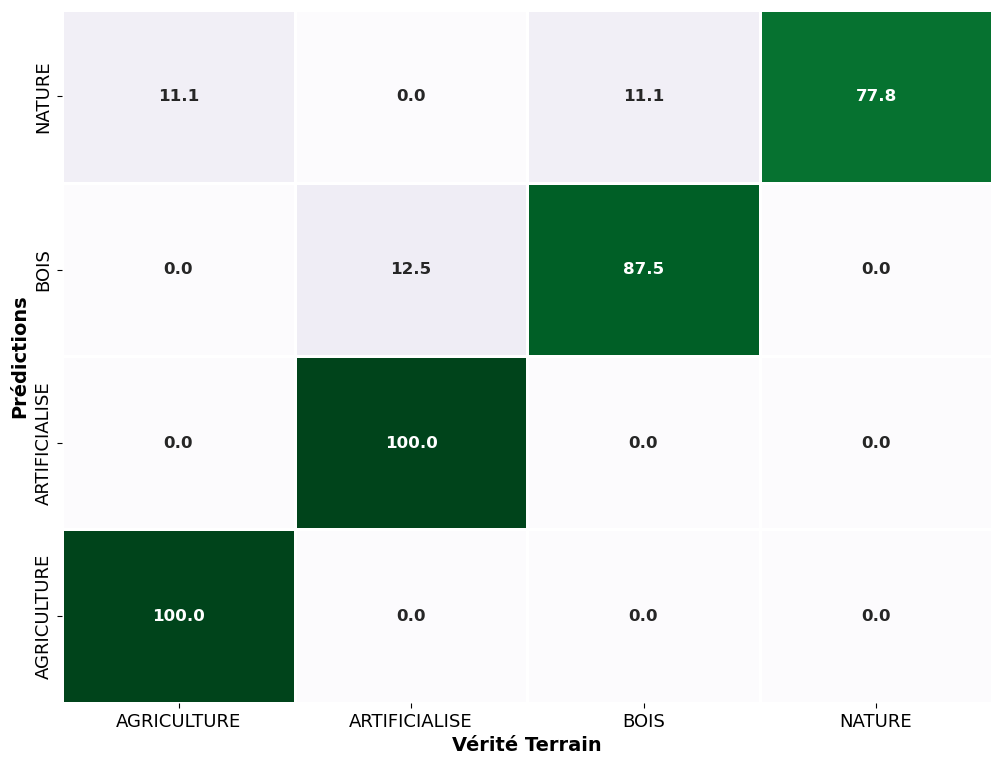

La matrice a été exportée avec la diagonale inversée ici : C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO\matrice_confusion_classe_4_M1.png


In [85]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialisation
chemin_entree = r"C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO"
chemin_sortie = os.path.join(chemin_entree, "matrice_confusion_classe_4_M1.png") # nom a changer en fonction du type de parcelle

# 1. Chargement des données
df = pd.read_csv(os.path.join(chemin_entree, 'FORME_PARCELLE.csv'), sep=None, engine='python', encoding='utf-8-sig')

# 2. Préparation des labels
labels = sorted(df['CLASSE_REELLE'].unique())

# 3. Calcul de la matrice
cm = confusion_matrix(df['PRED_SCORE'], df['CLASSE_REELLE'], labels=labels)
cm_perc = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100).round(1)

# --- ÉTAPE CRUCIALE POUR L'INVERSION ---
# On inverse l'ordre des lignes de la matrice pour que le bas devienne le haut
cm_perc_flipped = np.flipud(cm_perc)
# On crée une liste de labels inversée uniquement pour l'axe Y (Prédictions)
labels_y_flipped = labels[::-1]

# 4. Préparation des masques sur la matrice inversée
mask_diag = np.eye(len(cm_perc_flipped), dtype=bool)
# On inverse aussi le masque pour qu'il suive la nouvelle diagonale (bas-gauche vers haut-droite)
mask_diag = np.flipud(mask_diag)
mask_off = ~mask_diag

# 5. Affichage graphique
plt.figure(figsize=(12, 9))

# Étape A : On affiche les DÉSACCORDS (Hors-diagonale)
sns.heatmap(cm_perc_flipped, 
            annot=True, fmt=".1f", mask=mask_diag, cmap="Purples", 
            cbar=False, linewidths=1, linecolor='white', 
            vmin=0, vmax=100,
            xticklabels=labels, 
            yticklabels=labels_y_flipped, # Labels inversés ici
            annot_kws={"size": 12, "weight": "bold"})

# Étape B : On affiche les ACCORDS (Diagonale)
# Note : j'ai utilisé vmin=-50 pour que les scores faibles comme 30% ressortent mieux en vert
sns.heatmap(cm_perc_flipped, 
            annot=True, fmt=".1f", mask=mask_off, cmap="Greens", 
            vmin=-50, vmax=100,
            cbar=False, linewidths=1, linecolor='white',
            xticklabels=labels, 
            yticklabels=labels_y_flipped, # Labels inversés ici
            annot_kws={"size": 12, "weight": "bold"})

plt.xlabel('Vérité Terrain', fontweight='bold', fontsize=14)
plt.ylabel('Prédictions', fontweight='bold', fontsize=14)
#plt.title('', pad=20, fontweight='bold')

plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)

# Exportation
plt.savefig(chemin_sortie, dpi=300, bbox_inches='tight')
plt.show()

print(f"La matrice a été exportée avec la diagonale inversée ici : {chemin_sortie}")

## Résumé statistique de la matrice de confusion : Rappel, Précision, Score-F1

In [78]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

# Initialisation : indication du chemin d'entrée
chemin_entree = r"C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO"

# 1. Chargement des données
df = pd.read_csv(os.path.join(chemin_entree, 'FORME_PARCELLE.csv'), sep=None, engine='python', encoding='utf-8-sig')


# Définition des colonnes de référence
y_true = df['CLASSE_REELLE']
y_pred = df['PRED_SCORE']

# 2. Calcul des métriques détaillées (Précision, Rappel, F1-Score)
# output_dict=True permet de transformer le rapport en dictionnaire pour manipulation
report_dict = classification_report(y_true, y_pred, output_dict=True)

# Conversion en DataFrame pour un affichage propre
report_df = pd.DataFrame(report_dict).transpose()

# 3. Calcul de l'Accuracy et du Kappa
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

# --- AFFICHAGE DES RÉSULTATS ---

print("-" * 60)
print("METRIQUES DETAILLEES PAR CLASSE (SCORE)")
print("-" * 60)
# On affiche uniquement les classes individuelles (en excluant les lignes de moyennes à la fin)
print(report_df.iloc[:-3, :3].to_string())

print("\n" + "-" * 60)
print("METRIQUES MOYENNES (MACRO & WEIGHTED)")
print("-" * 60)
# 'macro avg' : moyenne arithmétique simple
# 'weighted avg' : moyenne pondérée par le nombre d'échantillons
print(report_df.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']].to_string())

print("\n" + "-" * 60)
print("INDICES GLOBAUX")
print("-" * 60)
print(f"Accuracy Globale : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Indice Kappa     : {kappa:.4f}")

------------------------------------------------------------
METRIQUES DETAILLEES PAR CLASSE (SCORE)
------------------------------------------------------------
               precision    recall  f1-score
AGRICULTURE     0.909091  1.000000  0.952381
ARTIFICIALISE   1.000000  0.333333  0.500000
BOIS            0.916667  1.000000  0.956522
EAU             1.000000  1.000000  1.000000
NATURE          0.900000  0.900000  0.900000

------------------------------------------------------------
METRIQUES MOYENNES (MACRO & WEIGHTED)
------------------------------------------------------------
              precision    recall  f1-score
macro avg      0.945152  0.846667  0.861781
weighted avg   0.923628  0.918919  0.906636

------------------------------------------------------------
INDICES GLOBAUX
------------------------------------------------------------
Accuracy Globale : 0.9189 (91.89%)
Indice Kappa     : 0.8906


# Matrice de confusion Méthode 2 : Arbre de décision

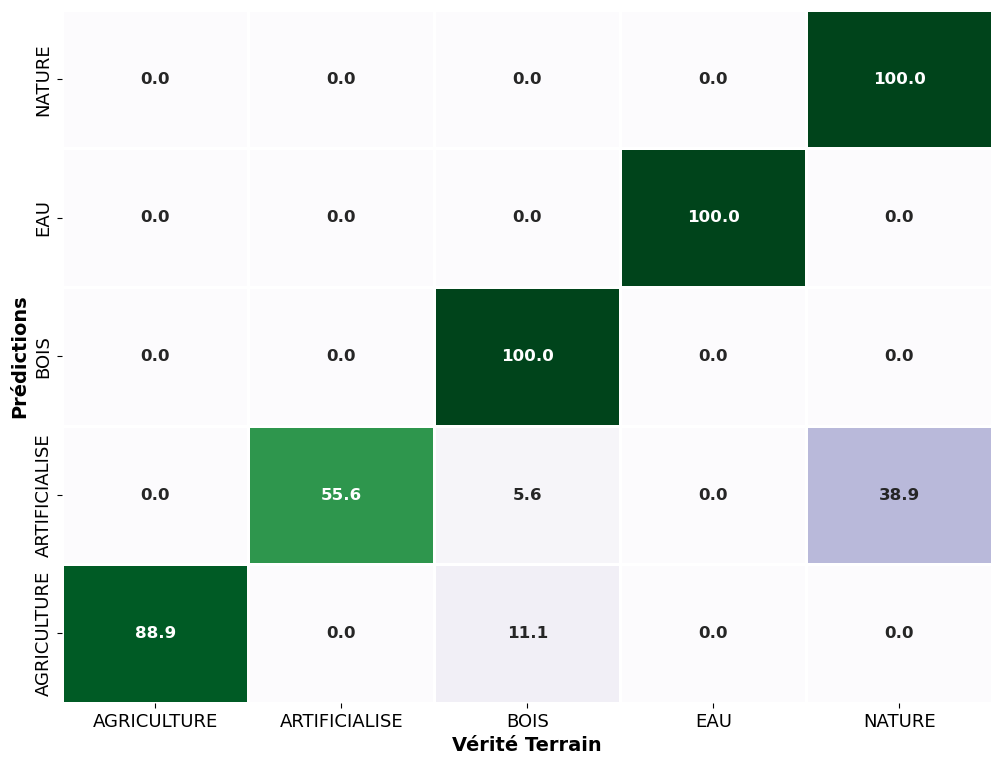

La matrice a été exportée avec la diagonale inversée ici : C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO\matrice_confusion_classe_3_M2.png


In [92]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialisation
chemin_entree = r"C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO"
chemin_sortie = os.path.join(chemin_entree, "matrice_confusion_classe_3_M2.png")

# 1. Chargement des données
df = pd.read_csv(os.path.join(chemin_entree, 'FORME_PARCELLE.csv'), sep=None, engine='python', encoding='utf-8-sig')

# 2. Préparation des labels
labels = sorted(df['CLASSE_REELLE'].unique())

# 3. Calcul de la matrice
cm = confusion_matrix(df['PRED_ARBRE'], df['CLASSE_REELLE'], labels=labels)
cm_perc = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100).round(1)

# --- ÉTAPE CRUCIALE POUR L'INVERSION ---
# On inverse l'ordre des lignes de la matrice pour que le bas devienne le haut
cm_perc_flipped = np.flipud(cm_perc)
# On crée une liste de labels inversée uniquement pour l'axe Y (Prédictions)
labels_y_flipped = labels[::-1]

# 4. Préparation des masques sur la matrice inversée
mask_diag = np.eye(len(cm_perc_flipped), dtype=bool)
# On inverse aussi le masque pour qu'il suive la nouvelle diagonale (bas-gauche vers haut-droite)
mask_diag = np.flipud(mask_diag)
mask_off = ~mask_diag

# 5. Affichage graphique
plt.figure(figsize=(12, 9))

# Étape A : On affiche les DÉSACCORDS (Hors-diagonale)
sns.heatmap(cm_perc_flipped, 
            annot=True, fmt=".1f", mask=mask_diag, cmap="Purples", 
            cbar=False, linewidths=1, linecolor='white', 
            vmin=0, vmax=100,
            xticklabels=labels, 
            yticklabels=labels_y_flipped, # Labels inversés ici
            annot_kws={"size": 12, "weight": "bold"})

# Étape B : On affiche les ACCORDS (Diagonale)
# Note : j'ai utilisé vmin=-50 pour que les scores faibles comme 30% ressortent mieux en vert
sns.heatmap(cm_perc_flipped, 
            annot=True, fmt=".1f", mask=mask_off, cmap="Greens", 
            vmin=-50, vmax=100,
            cbar=False, linewidths=1, linecolor='white',
            xticklabels=labels, 
            yticklabels=labels_y_flipped, # Labels inversés ici
            annot_kws={"size": 12, "weight": "bold"})

plt.xlabel('Vérité Terrain', fontweight='bold', fontsize=14)
plt.ylabel('Prédictions', fontweight='bold', fontsize=14)
#plt.title('Matrice de Confusion (en %) sur les grandes parcelles cadastrales de forme complexe', pad=20, fontweight='bold')

plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)

# Exportation
plt.savefig(chemin_sortie, dpi=300, bbox_inches='tight')
plt.show()

print(f"La matrice a été exportée avec la diagonale inversée ici : {chemin_sortie}")

## Résumé statistique de la métrice de confsuion : Rappel, Précision, Score-F1

In [82]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score

# Initialisation : indication du chemin d'entrée
chemin_entree = r"C:/Users/angee/Desktop/M2/GEOLAB/DONNEES/CLASSIFICATION_FINALE/COMPARAISON_METHODO"

# 1. Chargement des données
df = pd.read_csv(os.path.join(chemin_entree, 'FORME_PARCELLE.csv'), sep=None, engine='python', encoding='utf-8-sig')


# Définition des colonnes de référence
y_true = df['CLASSE_REELLE']
y_pred = df['PRED_ARBRE']

# 2. Calcul des métriques détaillées (Précision, Rappel, F1-Score)
# output_dict=True permet de transformer le rapport en dictionnaire pour manipulation
report_dict = classification_report(y_true, y_pred, output_dict=True)

# Conversion en DataFrame pour un affichage propre
report_df = pd.DataFrame(report_dict).transpose()

# 3. Calcul de l'Accuracy et du Kappa
accuracy = accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

# --- AFFICHAGE DES RÉSULTATS ---

print("-" * 60)
print("METRIQUES DETAILLEES PAR CLASSE (ARBRE)")
print("-" * 60)
# On affiche uniquement les classes individuelles (en excluant les lignes de moyennes à la fin)
print(report_df.iloc[:-3, :3].to_string())

print("\n" + "-" * 60)
print("METRIQUES MOYENNES (MACRO & WEIGHTED)")
print("-" * 60)
# 'macro avg' : moyenne arithmétique simple
# 'weighted avg' : moyenne pondérée par le nombre d'échantillons
print(report_df.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']].to_string())

print("\n" + "-" * 60)
print("INDICES GLOBAUX")
print("-" * 60)
print(f"Accuracy Globale : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Indice Kappa     : {kappa:.4f}")

------------------------------------------------------------
METRIQUES DETAILLEES PAR CLASSE (ARBRE)
------------------------------------------------------------
               precision  recall  f1-score
AGRICULTURE     0.769231     1.0  0.869565
ARTIFICIALISE   0.800000     1.0  0.888889
BOIS            0.888889     0.8  0.842105
EAU             1.000000     1.0  1.000000
NATURE          0.833333     0.5  0.625000

------------------------------------------------------------
METRIQUES MOYENNES (MACRO & WEIGHTED)
------------------------------------------------------------
              precision    recall  f1-score
macro avg      0.858291  0.860000  0.845112
weighted avg   0.840822  0.833333  0.820900

------------------------------------------------------------
INDICES GLOBAUX
------------------------------------------------------------
Accuracy Globale : 0.8333 (83.33%)
Indice Kappa     : 0.7882
